<a href="https://colab.research.google.com/github/beriaacan/Machine-Learning-Algorithms/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical


In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Bu bölüm, MNIST veri setini yükler ve verileri ağın girdisi olarak kullanıma hazır hale getirir

In [29]:
# Normalize data
size=28*28 # her bir görüntüyü, sinir ağının girdi katmanına uygun tek bir sıra halinde düzleştirir
#veri türünü float32'ye dönüştürür. Bu, hesaplama sırasında daha fazla hassasiyet sağlar ve birçok derin öğrenme kütüphanesi tarafından tercih edilir.
#her bir piksel değerini 255'e bölerek normalleştirir.
# MNIST veri setindeki piksel değerleri 0 ile 255 arasındadır, bu yüzden bu adım her bir piksel değerini 0 ile 1 arasında bir aralığa ölçeklendirir.

X_train = X_train.reshape(X_train.shape[0], size).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], size).astype('float32') / 255


Görüntüler piksel değerlerini içeren 28x28 boyutlu matrislerdir. Bu matrisler, her bir görüntüyü tek bir vektöre dönüştürmek için yeniden şekillendirilir (784 piksel).



In [30]:
# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Piksel değerleri 0 ile 1 arasında olacak şekilde normalize edilir. Etiketler (y_train, y_test), her rakam için one-hot encoding kullanılarak dönüştürülür.

ör: Örneğin, rakam "5" için one-hot encoded vektör [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [31]:
model = Sequential() #Keras'ta katmanların sırayla (ardışık olarak) eklenmesini sağlar.
model.add(Flatten(input_shape=(784,)))
#Flatten katmanı, girdi verilerini düz bir vektöre dönüştürür.
#Bu durumda, input_shape=(784,) parametresi, girdi verilerinin her birinin 784 öğeli (28x28 piksellik bir görüntüyü düzleştirmek gibi) olduğunu belirtir.
#Bu, modelin, 2D görüntü verilerini işleyebilmesi için gereklidir.


model.add(Dense(10, activation='relu'))

#Bu satırda Dense katmanı eklenir. Bu, tam bağlantılı (fully connected) bir katmandır.
# 10 parametresi, katmandaki nöron sayısını belirtir.
#ReLU, genellikle gizli katmanlarda kullanılan popüler bir aktivasyon fonksiyonudur ve lineer olmayan özellikleri modellemeye yardımcı olur.

model.add(Dense(10, activation='softmax'))

# ikinci Dense katmanı, modelin çıkış katmanıdır. Burada yine 10 nöron kullanılır, bu da MNIST veri setindeki 10 farklı rakamı (0'dan 9'a) temsil eder.
# activation='softmax' parametresi, softmax aktivasyon fonksiyonunu belirtir.
# Softmax, çok sınıflı sınıflandırma görevlerinde yaygın olarak kullanılır ve her bir sınıf için olasılık dağılımı üretir,
# böylece modelin tahminleri, toplamı 1'e eşit olan olasılık değerleri olarak yorumlanabilir.


Bu model, MNIST veri setindeki el yazısı rakamlarını sınıflandırmak için kullanılabilir. Model, görüntüleri alır, onları düzleştirir, öğrenme işlemini gerçekleştirir ve son olarak, her bir rakamın olasılığını tahmin eder.

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model, categorical_crossentropy kayıp fonksiyonu, adam optimize edici ve doğruluk metriği kullanılarak derlenir. Bu, eğitim sürecinin nasıl gerçekleşeceğini belirler.



In [33]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)


Epoch 1/10
1875/1875 - 5s - loss: 0.4847 - accuracy: 0.8644 - 5s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 3s - loss: 0.2833 - accuracy: 0.9211 - 3s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 3s - loss: 0.2591 - accuracy: 0.9276 - 3s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 3s - loss: 0.2445 - accuracy: 0.9303 - 3s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.2343 - accuracy: 0.9338 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 3s - loss: 0.2251 - accuracy: 0.9363 - 3s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 3s - loss: 0.2201 - accuracy: 0.9363 - 3s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 3s - loss: 0.2141 - accuracy: 0.9380 - 3s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 4s - loss: 0.2094 - accuracy: 0.9393 - 4s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 3s - loss: 0.2053 - accuracy: 0.9403 - 3s/epoch - 2ms/step


Model, eğitim veri seti üzerinde 10 epoch boyunca eğitilir. Her epoch, veri setinin tamamının modele sunulduğu bir döngüdür. batch_size=32 her adımda 32 örnek kullanılacağını belirtir.

In [34]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', accuracy)


313/313 - 1s - loss: 0.2265 - accuracy: 0.9362 - 899ms/epoch - 3ms/step
Test accuracy: 0.9362000226974487


1/1 [==============================] - 0s 81ms/step
Prediction:  6
Label:  6


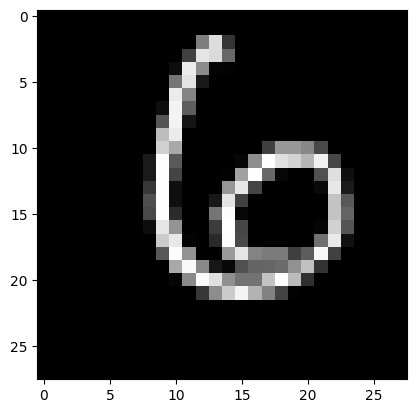

In [35]:
index = 100
test_number = X_test[index]
test_number_true_label = np.argmax(y_test[index])
prediction = model.predict(test_number.reshape(1, 784))
predicted_label = np.argmax(prediction)

print("Prediction: ", predicted_label)
print("Label: ", test_number_true_label)

test_image = test_number.reshape((28, 28))*255
plt.gray()
plt.imshow(test_image, interpolation='nearest')
plt.show()
